In [42]:


from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import os
os.chdir("/content/gdrive/My Drive/112_2_LATIA/homework1/")
!ls -l "/content/gdrive/My Drive/112_2_LATIA/homework1/opendata111m113.csv"


Mounted at /content/gdrive/
-rw------- 1 root root 61432822 Apr  6 07:56 '/content/gdrive/My Drive/112_2_LATIA/homework1/opendata111m113.csv'


In [48]:

import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']


In [57]:
import pandas as pd

csv_file = './opendata111m113.csv'

df = pd.read_csv(csv_file)
print(df.head(), '\n')

print('\n', df.info(verbose=True, show_counts=True))

print('\n', df.isna().sum())

print('\n', df.describe(include='all'))

   統計年度     按照別     區域別  婚姻類型 性別 原屬國籍（地區）  教育程度      年齡  結婚人數
0   111  按發生日期分  新北市板橋區  不同性別  男       本國  博士畢業   未滿15歲     0
1   111  按發生日期分  新北市板橋區  不同性別  男       本國  博士畢業  15～19歲     0
2   111  按發生日期分  新北市板橋區  不同性別  男       本國  博士畢業  20～24歲     0
3   111  按發生日期分  新北市板橋區  不同性別  男       本國  博士畢業  25～29歲     0
4   111  按發生日期分  新北市板橋區  不同性別  男       本國  博士畢業  30～34歲     4 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618240 entries, 0 to 618239
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   統計年度      618240 non-null  int64 
 1   按照別       618240 non-null  object
 2   區域別       618240 non-null  object
 3   婚姻類型      618240 non-null  object
 4   性別        618240 non-null  object
 5   原屬國籍（地區）  618240 non-null  object
 6   教育程度      618240 non-null  object
 7   年齡        618240 non-null  object
 8   結婚人數      618240 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 42.5+ MB

 None

 統計年度        0
按照別         0

#1.111年碩士畢業結婚人數最多的地區是哪裡?

In [69]:
df1 = df[['統計年度', '按照別', '區域別', '婚姻類型', '性別', '原屬國籍（地區）', '教育程度', '年齡', '結婚人數']] # 取出想要觀看的欄位
print("本資料集共有", len(df1), "筆紀錄")
df1_1 = df1[df1['教育程度'] == '碩士畢業']
df1_1_sorted = df1_1.sort_values(by='結婚人數', ascending=False)
print("111年碩士畢業結婚人數最多的地區為", df1_1_sorted.head(1)["區域別"].values)


本資料集共有 88320 筆紀錄
111年碩士畢業結婚人數最多的地區為 ['新北市板橋區']


# 2. 各教育程度分別有多少人結婚?

教育程度
博士畢業        1359
國中畢業       25780
國小畢業以下      3311
大學畢業      118239
專科畢業       14916
碩士畢業       28112
高中畢業       63349
Name: 結婚人數, dtype: int64


<Axes: ylabel='教育程度'>

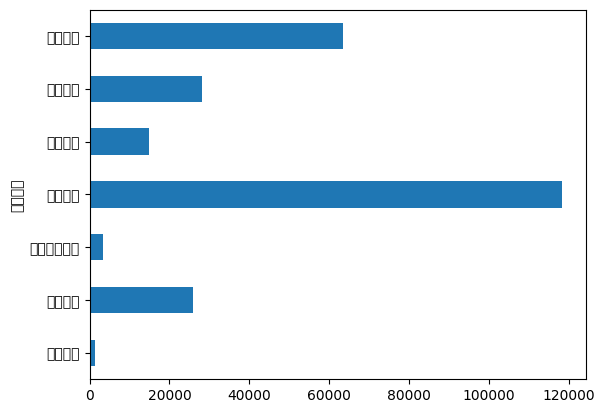

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

csv_file = './opendata111m113.csv'

df = pd.read_csv(csv_file)

result = df.groupby('教育程度')['結婚人數'].sum()

print(result)
plt.xlabel("教育程度")
plt.ylabel("結婚人數")
result.plot(kind='barh')


# 3. 各國籍分別有多少人結婚?

原屬國籍（地區）
其他地區       3624
大陸地區       3803
本國       239865
東南亞地區      6539
港澳地區       1235
Name: 結婚人數, dtype: int64


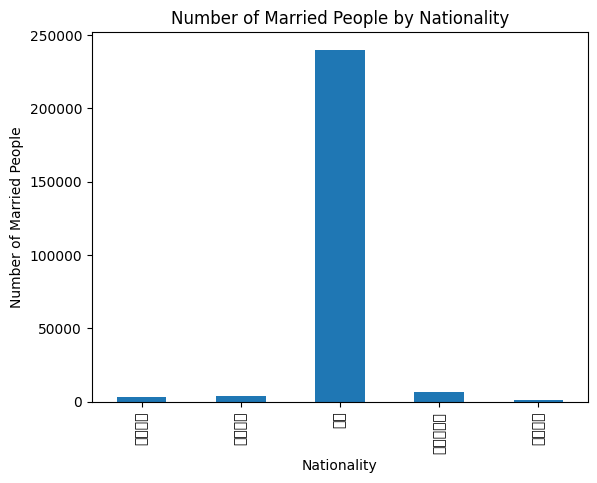

In [73]:
import pandas as pd
import matplotlib.pyplot as plt


csv_file = './opendata111m113.csv'

df = pd.read_csv(csv_file)

result = df.groupby('原屬國籍（地區）')['結婚人數'].sum()

# Print the result
print(result)

result.plot(kind='bar')

plt.title('Number of Married People by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Married People')

plt.show()



#4. 各縣市分別有多少人結婚，位於新北市板橋區有多少人結婚?

區域別
南投縣中寮鄉     102
南投縣仁愛鄉     204
南投縣信義鄉     168
南投縣南投市     998
南投縣名間鄉     324
          ... 
高雄市阿蓮區     294
高雄市鳥松區     490
高雄市鳳山區    4026
高雄市鹽埕區     246
高雄市鼓山區    1382
Name: 結婚人數, Length: 368, dtype: int64

 3006
新北市板橋區結婚人數: 6038


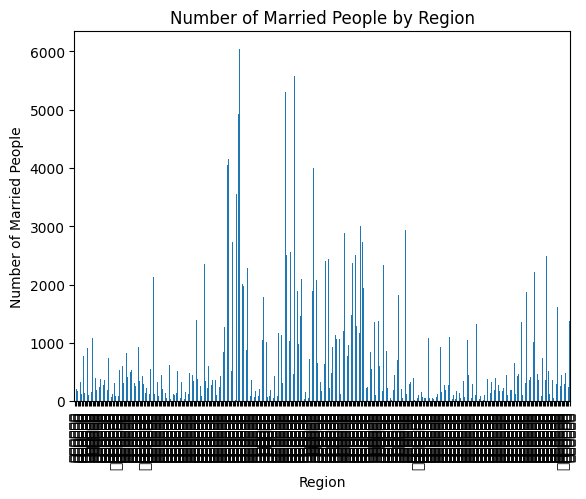

In [88]:
import pandas as pd
import matplotlib.pyplot as plt


csv_file = './opendata111m113.csv'

df = pd.read_csv(csv_file)

result = df.groupby('區域別')['結婚人數'].sum()

print(result)
print('\n', result['臺北市大安區'])
print(f"新北市板橋區結婚人數: {result['新北市板橋區']}")

result.plot(kind='bar')

plt.title('Number of Married People by Region')
plt.xlabel('Region')
plt.ylabel('Number of Married People')

plt.show()



 # 5. 最多與最少人結婚的縣市?

The region with the most number of people who are married is 新北市板橋區.
The region with the least number of people who are married is 金門縣烏坵鄉.


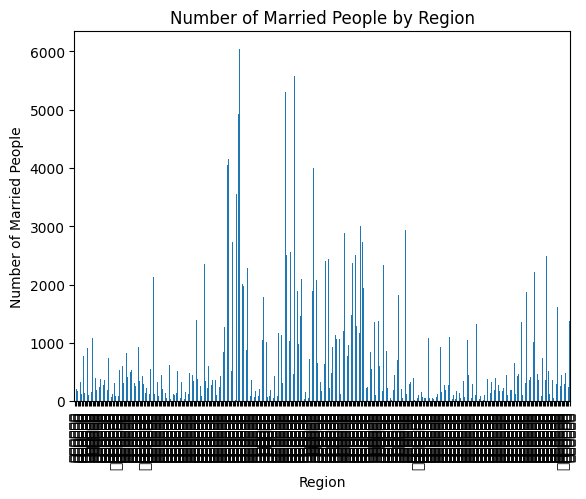

In [89]:
import pandas as pd
import matplotlib.pyplot as plt


csv_file = './opendata111m113.csv'

df = pd.read_csv(csv_file)
result = df.groupby('區域別')['結婚人數'].sum()

max_region = result.idxmax()

min_region = result.idxmin()

print(f"The region with the most number of people who are married is {max_region}.")
print(f"The region with the least number of people who are married is {min_region}.")

result.plot(kind='bar')


plt.title('Number of Married People by Region')
plt.xlabel('Region')
plt.ylabel('Number of Married People')

plt.show()


 # 6. 異性和同性婚姻的比例?

Number of different-sex marriages: 250080
Number of same-sex marriages: 4986


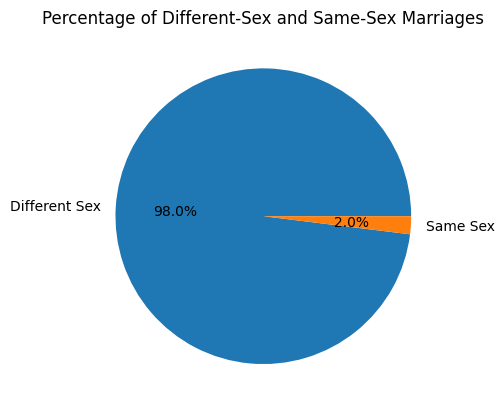

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file = './opendata111m113.csv'

df = pd.read_csv(csv_file)

different_sex_marriages = df[df['婚姻類型'] == '不同性別']['結婚人數'].sum()
same_sex_marriages = df[df['婚姻類型'] == '相同性別']['結婚人數'].sum()

print(f"Number of different-sex marriages: {different_sex_marriages}")
print(f"Number of same-sex marriages: {same_sex_marriages}")


plt.pie([different_sex_marriages, same_sex_marriages], labels=['Different Sex', 'Same Sex'], autopct='%1.1f%%')

plt.title('Percentage of Different-Sex and Same-Sex Marriages')

plt.show()
